# **1. Data Understanding & Exploration**

In [2]:
# %pip install pandas numpy nltk spacy gensim beautifulsoup4 contractions wordcloud textblob vaderSentiment scikit-learn tensorflow transformers matplotlib seaborn scikit-plot
# %pip install tf-keras

## *libraries*

In [3]:
import pandas as pd  # DataFrames, CSV handling
import numpy as np  # Numerical operations
import re  # Regular expressions for text cleaning
import string  # Punctuation handling
import nltk  # Natural Language Toolkit
from nltk.corpus import stopwords  # Stopwords removal
from nltk.tokenize import word_tokenize  # Tokenization
from nltk.stem import WordNetLemmatizer, PorterStemmer  # Lemmatization & Stemming
from bs4 import BeautifulSoup  # Removing HTML tags
import contractions  # Expanding contractions (e.g., "don't" → "do not")
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # BoW, TF-IDF
from gensim.models import Word2Vec  # Word embeddings
import spacy  # Advanced NLP processing
!python -m spacy download en_core_web_sm  # Small English model
import matplotlib.pyplot as plt  # Standard plotting
import seaborn as sns  # Statistical data visualization
from wordcloud import WordCloud  # Word cloud visualization
from collections import Counter  # Word frequency analysis
from textblob import TextBlob  # Sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer  # VADER for short text sentiment
from sklearn.model_selection import train_test_split  # Train-test split
from sklearn.naive_bayes import MultinomialNB  # Naïve Bayes classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.svm import SVC  # Support Vector Machine
from sklearn.pipeline import Pipeline  # Building ML pipelines
from sklearn.preprocessing import LabelEncoder  # Encoding categorical labels
import tensorflow as tf  # Deep learning framework
from tensorflow.keras.preprocessing.text import Tokenizer  # Text tokenization
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Sequence padding
from tensorflow.keras.models import Sequential  # Model initialization
from tensorflow.keras.layers import Embedding, LSTM, Dense  # Layers for RNN
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D  # Layers for CNN
from tensorflow.keras.layers import Dropout  # Dropout layer
# from transformers import BertTokenizer, TFBertModel  # BERT model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import scikitplot as skplt  # Pretty confusion matrix
import datetime  # Handling dates
import time  # Time conversions
import joblib  # Save & load ML models
import pickle  # Save Python objects
import warnings  # Ignore warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to C:\Users\Edwin
[nltk_data]     George\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Edwin
[nltk_data]     George\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Edwin
[nltk_data]     George\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


## **1.1 Loading and Inspecting the Dataset**

In [4]:
p_movies = pd.read_csv("cleaned_p_movies.csv")
p_movies.head()

,rating,title_x,text,asin,parent_asin,timestamp,verified_purchase,main_category,title_y,average_rating,rating_number,description,price,categories,year,month,weekday
0,4,Four Stars,It was pretty good. Had some pretty comical sc...,B01KBKKU7G,B01KBKKU7G,2016-09-16 18:39:49.000,True,Prime Video,Seven Girlfriends,3.2,333.0,"[""Jesse has never had a problem finding a gir...",12.99,Comedy,2016,9,Friday
1,3,Ok love story,A bit slow and an unsatisfying ending,B01M0S0C8M,B01M0S0C8M,2016-11-08 22:14:17.000,True,Prime Video,Still Mine,4.6,4744.0,"[""James Cromwell gives a tour de force perform...",9.99,Drama,2016,11,Tuesday
2,1,TRASH,A movie based solely on INCEST. Storyline is g...,B00G2TAAVM,B00G2TAAVM,2022-08-22 20:06:25.847,True,Prime Video,How I Live Now,4.3,907.0,"['Set in the near-future UK, Saoirse Ronan pla...",12.99,International,2022,8,Monday
3,5,Five Stars,Excellent!!!,B018HJ03UC,B018HJ03UC,2016-01-25 18:47:06.000,True,Prime Video,The Martian,4.8,45859.0,"['From legendary director Ridley Scott (Alien,...",4.99,Science Fiction,2016,1,Monday
4,2,Not what it used to be,This used to be a favorite of mine but I just ...,B07FLP19K1,B07FLP19K1,2018-12-03 16:52:02.089,True,Prime Video,On The Case with Paula Zahn,4.6,141.0,['On The Case with Paula Zahn takes viewers on...,22.99,Suspense,2018,12,Monday


In [5]:
# Check dataset structure
p_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24112 entries, 0 to 24111
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating             24112 non-null  int64  
 1   title_x            24112 non-null  object 
 2   text               24112 non-null  object 
 3   asin               24112 non-null  object 
 4   parent_asin        24112 non-null  object 
 5   timestamp          24112 non-null  object 
 6   verified_purchase  24112 non-null  bool   
 7   main_category      24112 non-null  object 
 8   title_y            24112 non-null  object 
 9   average_rating     24112 non-null  float64
 10  rating_number      24112 non-null  float64
 11  description        24112 non-null  object 
 12  price              24112 non-null  float64
 13  categories         24112 non-null  object 
 14  year               24112 non-null  int64  
 15  month              24112 non-null  int64  
 16  weekday            241

In [6]:
# Summary statistics (including categorical features)
p_movies.describe(include='all')

,rating,title_x,text,asin,parent_asin,timestamp,verified_purchase,main_category,title_y,average_rating,rating_number,description,price,categories,year,month,weekday
count,24112.000000,24112,24112,24112,24112,24112,24112,24112,24112,24112.000000,24112.000000,24112,24112.000000,24112,24112.000000,24112.000000,24112
unique,NaN,14926,21799,6220,6220,24108,2,1,5392,NaN,NaN,5737,NaN,29,NaN,NaN,7
top,NaN,Five Stars,Great movie,B07S3XZRM4,B07S3XZRM4,2016-02-28 02:41:52.000,True,Prime Video,Aladdin,NaN,NaN,['From Disney comes the thrilling and vibrant ...,NaN,Comedy,NaN,NaN,Monday
freq,NaN,3059,146,265,265,2,19839,24112,287,NaN,NaN,287,NaN,5839,NaN,NaN,3676
mean,4.121724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.507005,13685.687873,NaN,14.568819,NaN,2017.147686,6.358825,NaN
std,1.269626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.358735,21184.469923,NaN,7.191598,NaN,2.602637,3.518188,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.900000,2.000000,NaN,0.000000,NaN,2009.000000,1.000000,NaN
25%,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.400000,990.000000,NaN,9.990000,NaN,2015.000000,3.000000,NaN
50%,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.600000,5021.500000,NaN,14.690000,NaN,2017.000000,6.000000,NaN
75%,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.700000,17750.000000,NaN,16.790000,NaN,2019.000000,9.000000,NaN


In [7]:
# Check for missing values
p_movies.isnull().sum()

rating               0
title_x              0
text                 0
asin                 0
parent_asin          0
timestamp            0
verified_purchase    0
main_category        0
title_y              0
average_rating       0
rating_number        0
description          0
price                0
categories           0
year                 0
month                0
weekday              0
dtype: int64

In [8]:
# Check for duplicate rows
p_movies.duplicated().sum()

0

In [9]:
p_movies.columns

Index(['rating', 'title_x', 'text', 'asin', 'parent_asin', 'timestamp',
       'verified_purchase', 'main_category', 'title_y', 'average_rating',
       'rating_number', 'description', 'price', 'categories', 'year', 'month',
       'weekday'],
      dtype='object')

## **1.2 Explore Text Data**

In [10]:
# View random text samples
p_movies['text'].sample(10)

# Check for special characters, emojis, HTML tags
import re
p_movies['text'].apply(lambda x: re.findall(r'[^\w\s]', str(x))).explode().value_counts()


text
.    69347
,    35728
'    16313
/    10550
!    10371
     ...  
😱        1
🎬        1
🤢        1
💘        1
∞        1
Name: count, Length: 115, dtype: int64

## **1.3 Check Class Distributions (if classification task)**

In [11]:
# If there is a categorical label column
if 'description' in p_movies.columns:
    print(p_movies['description'].value_counts(normalize=True))  # Check class balance

description
['From Disney comes the thrilling and vibrant live-action adaptation of the animated classic Aladdin, the exciting tale of the charming street rat Aladdin, the courageous, self-determined Princess Jasmine and the Genie who may be the key to their future.']                                                                                                                                                       0.011903
['From legendary director Ridley Scott (Alien, Prometheus) comes a gripping tale of human strength and the will to survive, starring Matt Damon as an astronaut stranded on Mars.']                                                                                                                                                                                                                                    0.010036
["Deputy US Marshal Raylan Givens (Timothy Olyphant) will start to pick at the thread of a cold case over 30 years in the making, unraveling a riddle that e

In [12]:
# If there is a categorical label column
if 'text' in p_movies.columns:
    print(p_movies['text'].value_counts(normalize=True))  # Check class balance

text
Great movie                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

## **2. Data Cleaning & Preprocessing**

### **2.1 Text Normalization**

In [13]:
# import nltk
# import string
# import re
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer, PorterStemmer

# Download necessary NLTK resources
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define a function to clean text
def clean_text(text):
    if isinstance(text, str):  # Ensure text is a string
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'\d+', '', text)  # Remove numbers
        text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
        tokens = word_tokenize(text)  # Tokenize text
        tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
        tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
        return ' '.join(tokens)
    return text  # Return unchanged if not a string

# Apply cleaning function to 'text' column
p_movies['text'] = p_movies['text'].apply(clean_text)
p_movies.head()

,rating,title_x,text,asin,parent_asin,timestamp,verified_purchase,main_category,title_y,average_rating,rating_number,description,price,categories,year,month,weekday
0,4,Four Stars,pretty good pretty comical scene throughout gr...,B01KBKKU7G,B01KBKKU7G,2016-09-16 18:39:49.000,True,Prime Video,Seven Girlfriends,3.2,333.0,"[""Jesse has never had a problem finding a gir...",12.99,Comedy,2016,9,Friday
1,3,Ok love story,bit slow unsatisfying ending,B01M0S0C8M,B01M0S0C8M,2016-11-08 22:14:17.000,True,Prime Video,Still Mine,4.6,4744.0,"[""James Cromwell gives a tour de force perform...",9.99,Drama,2016,11,Tuesday
2,1,TRASH,movie based solely incest storyline garbage ac...,B00G2TAAVM,B00G2TAAVM,2022-08-22 20:06:25.847,True,Prime Video,How I Live Now,4.3,907.0,"['Set in the near-future UK, Saoirse Ronan pla...",12.99,International,2022,8,Monday
3,5,Five Stars,excellent,B018HJ03UC,B018HJ03UC,2016-01-25 18:47:06.000,True,Prime Video,The Martian,4.8,45859.0,"['From legendary director Ridley Scott (Alien,...",4.99,Science Fiction,2016,1,Monday
4,2,Not what it used to be,used favorite mine ’ enjoy anymore way zahn le...,B07FLP19K1,B07FLP19K1,2018-12-03 16:52:02.089,True,Prime Video,On The Case with Paula Zahn,4.6,141.0,['On The Case with Paula Zahn takes viewers on...,22.99,Suspense,2018,12,Monday


### **2.2 Handle Categorical Features**

In [14]:
# from sklearn.preprocessing import LabelEncoder

# # Encode categorical columns (if needed)
# categorical_cols = ['verified_purchase', 'main_category']
# label_encoders = {}

# for col in categorical_cols:
#     le = LabelEncoder()
#     p_movies[col] = le.fit_transform(p_movies[col].astype(str))
#     label_encoders[col] = le  # Store encoder for inverse transform if needed


# **3. Exploratory Data Analysis (EDA) & Visualizations**

### **3.1 Distribution of Ratings**

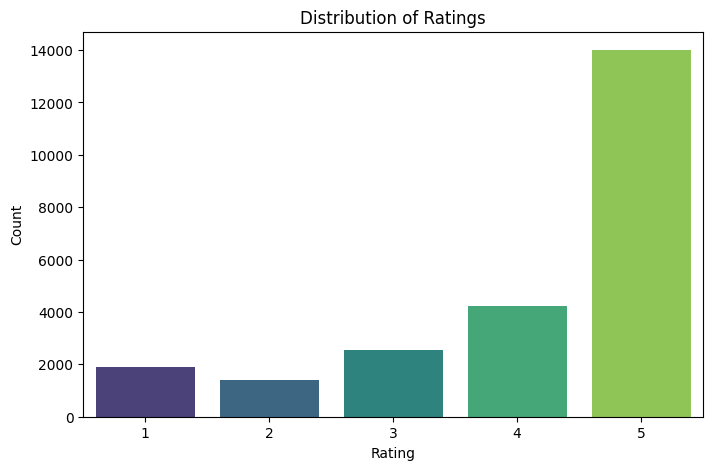

In [15]:
# Plot distribution of ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=p_movies, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### **3.2 Time-Based Trends (Reviews Over Time)**

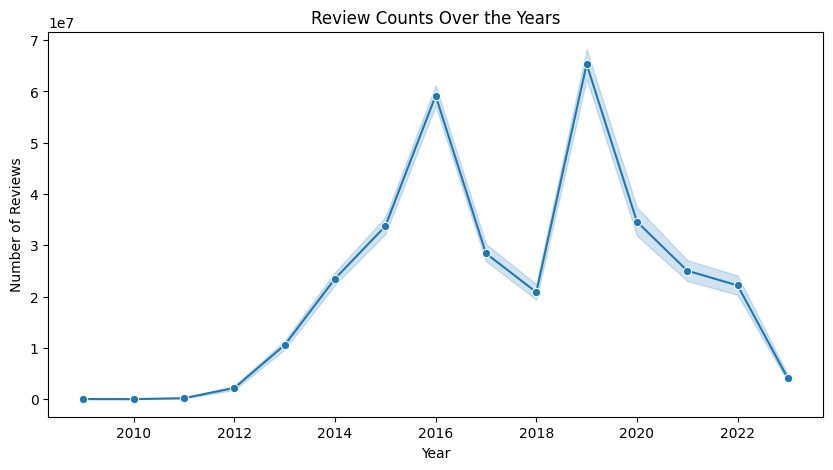

In [16]:
# Reviews per year
plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='rating_number', data=p_movies, estimator='sum', marker='o')
plt.title('Review Counts Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

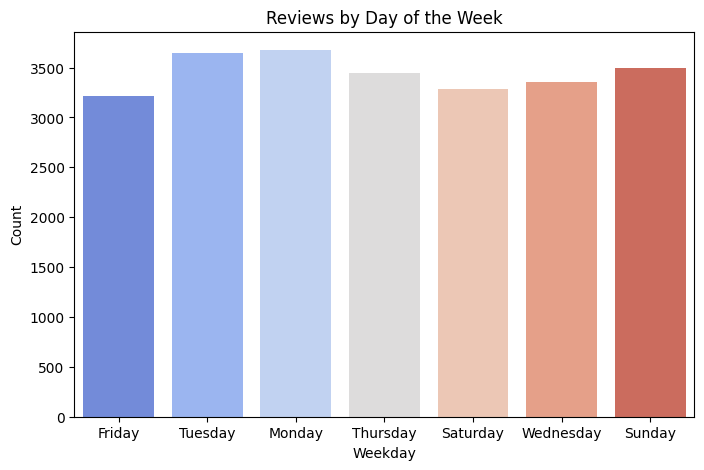

In [17]:
# Reviews by weekday
plt.figure(figsize=(8, 5))
sns.countplot(x='weekday', data=p_movies, palette='coolwarm')
plt.title('Reviews by Day of the Week')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.show()

### **3.3 Price vs. Average Rating Analysis**

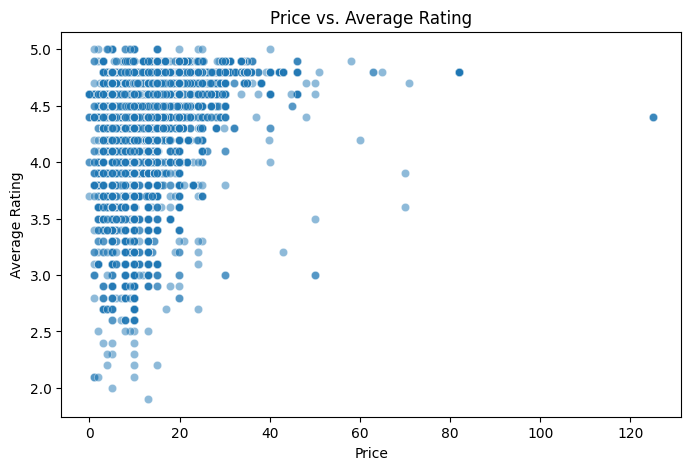

In [18]:
# Convert price column to numeric (handle missing values first)
p_movies['price'] = pd.to_numeric(p_movies['price'], errors='coerce')

# Scatter plot of price vs. average rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x='price', y='average_rating', data=p_movies, alpha=0.5)
plt.title('Price vs. Average Rating')
plt.xlabel('Price')
plt.ylabel('Average Rating')
plt.show()

### **3.4 Correlation Heatmap (Numerical Features Only)**

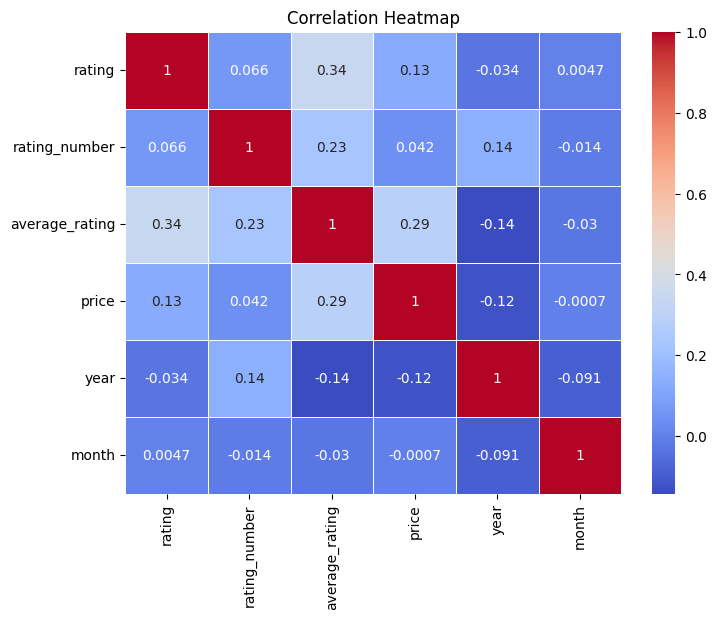

In [19]:
# Convert rating_number to numeric if necessary
p_movies['rating_number'] = pd.to_numeric(p_movies['rating_number'], errors='coerce')

# Compute correlation
numeric_cols = ['rating', 'rating_number', 'average_rating', 'price', 'year', 'month']
corr_matrix = p_movies[numeric_cols].corr()

# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### **3.5 Most Common Categories**

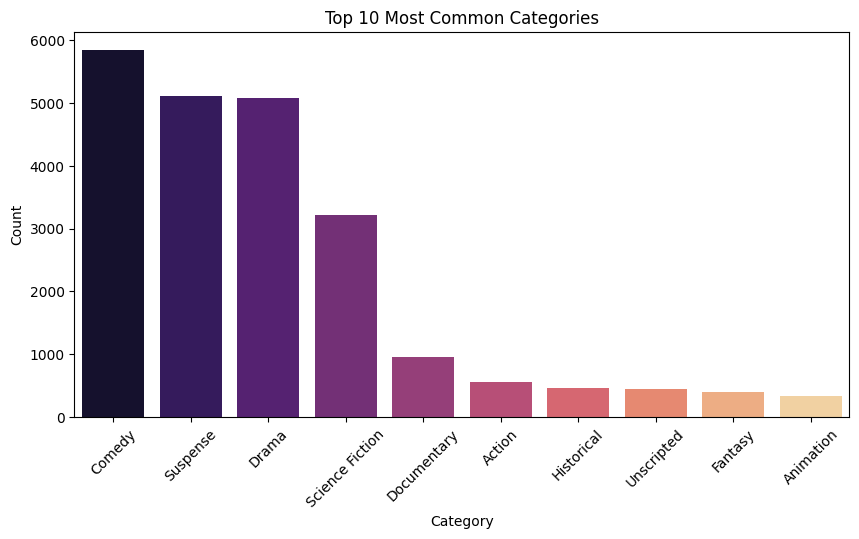

In [20]:
# Countplot for top categories
plt.figure(figsize=(10, 5))
sns.barplot(x=p_movies['categories'].value_counts().index[:10], 
            y=p_movies['categories'].value_counts().values[:10], 
            palette='magma')
plt.xticks(rotation=45)
plt.title('Top 10 Most Common Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

## **Feature Engineering: Text Vectorization for NLP**

#### **1. Bag-of-Words (BoW) Representation**

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize BoW vectorizer
bow_vectorizer = CountVectorizer()

# Convert processed text into BoW feature matrix
bow_matrix = bow_vectorizer.fit_transform(p_movies['text'])


**What it does:**
 Converts text into a sparse matrix of word counts, where each column represents a unique word, and each row corresponds to a document (text sample).

**Use case:** 
Simple and interpretable for NLP tasks like sentiment analysis, but lacks context or semantic meaning.

### **2. TF-IDF (Term Frequency - Inverse Document Frequency) Representation**

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Convert processed text into TF-IDF feature matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(p_movies['text'])

- **What it does**: Assigns a weight to each word based on its frequency in a document relative to its occurrence in the entire dataset.  
- **Use case**: Helps reduce the impact of common words while highlighting important terms in a document.

#### **3. Word Embeddings (Word2Vec)**

In [23]:
from gensim.models import Word2Vec

# Tokenize text into lists of words
tokenized_text = [text.split() for text in p_movies['text']]

# Train Word2Vec model on the dataset
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Create dictionary mapping words to their vector representations
word_vectors = {word: word2vec_model.wv[word] for word in word2vec_model.wv.index_to_key}

- **What it does**: Learns vector representations for words, capturing semantic relationships (e.g., "king" and "queen" have similar vectors).  
- **Use case**: Useful for deep learning models, recommendation systems, and tasks that require word similarity analysis.

#### **4. Transformer-based Embeddings (BERT)**

In [26]:
import torch
# from transformers import BertTokenizer, BertModel
from transformers import DistilBertTokenizer, DistilBertModel

# # Load BERT tokenizer and model
# bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# bert_model = BertModel.from_pretrained('bert-base-uncased')

bert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
bert_model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# Function to generate BERT embeddings
def get_bert_embedding(text):
    inputs = bert_tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = bert_model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Apply BERT embedding to each processed text
p_movies['bert_embedding'] = p_movies['text'].apply(get_bert_embedding)


- **What it does**: Uses BERT to generate contextual word embeddings, where meaning depends on the surrounding words.  
- **Use case**: Suitable for advanced NLP tasks like sentiment analysis, entity recognition, and machine translation.

In [27]:
p_movies.head()

,rating,title_x,text,asin,parent_asin,timestamp,verified_purchase,main_category,title_y,average_rating,rating_number,description,price,categories,year,month,weekday,bert_embedding
0,4,Four Stars,pretty good pretty comical scene throughout gr...,B01KBKKU7G,B01KBKKU7G,2016-09-16 18:39:49.000,True,Prime Video,Seven Girlfriends,3.2,333.0,"[""Jesse has never had a problem finding a gir...",12.99,Comedy,2016,9,Friday,"[0.062355723, -0.28965893, 0.032003667, 0.1281..."
1,3,Ok love story,bit slow unsatisfying ending,B01M0S0C8M,B01M0S0C8M,2016-11-08 22:14:17.000,True,Prime Video,Still Mine,4.6,4744.0,"[""James Cromwell gives a tour de force perform...",9.99,Drama,2016,11,Tuesday,"[-0.07376289, -0.40309674, 0.22592728, 0.18612..."
2,1,TRASH,movie based solely incest storyline garbage ac...,B00G2TAAVM,B00G2TAAVM,2022-08-22 20:06:25.847,True,Prime Video,How I Live Now,4.3,907.0,"['Set in the near-future UK, Saoirse Ronan pla...",12.99,International,2022,8,Monday,"[0.20666838, -0.1280619, -0.08137178, 0.024098..."
3,5,Five Stars,excellent,B018HJ03UC,B018HJ03UC,2016-01-25 18:47:06.000,True,Prime Video,The Martian,4.8,45859.0,"['From legendary director Ridley Scott (Alien,...",4.99,Science Fiction,2016,1,Monday,"[0.2969116, 0.22945474, -0.018994639, -0.02954..."
4,2,Not what it used to be,used favorite mine ’ enjoy anymore way zahn le...,B07FLP19K1,B07FLP19K1,2018-12-03 16:52:02.089,True,Prime Video,On The Case with Paula Zahn,4.6,141.0,['On The Case with Paula Zahn takes viewers on...,22.99,Suspense,2018,12,Monday,"[0.16273372, -0.097590715, 0.3668197, 0.161020..."


## **1. Word Cloud & Frequency Analysis**
#### **Generates a word cloud to visualize common words in the dataset.**

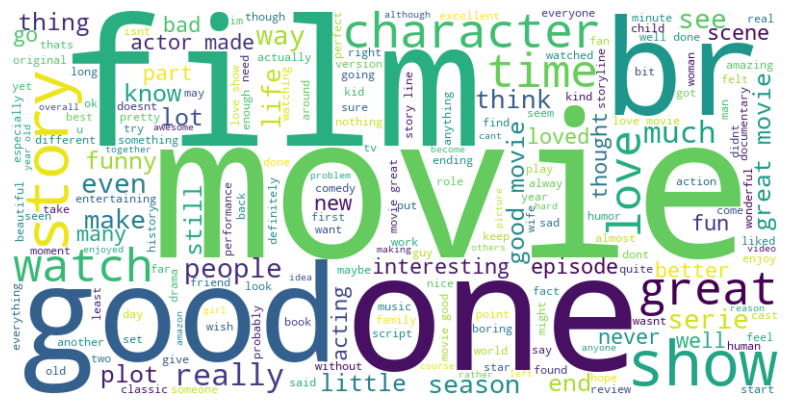

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(p_movies['text'])  # Combine all reviews into a single string
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### **2. Sentiment Distribution**
#### **Checks how ratings align with sentiment in text reviews.**

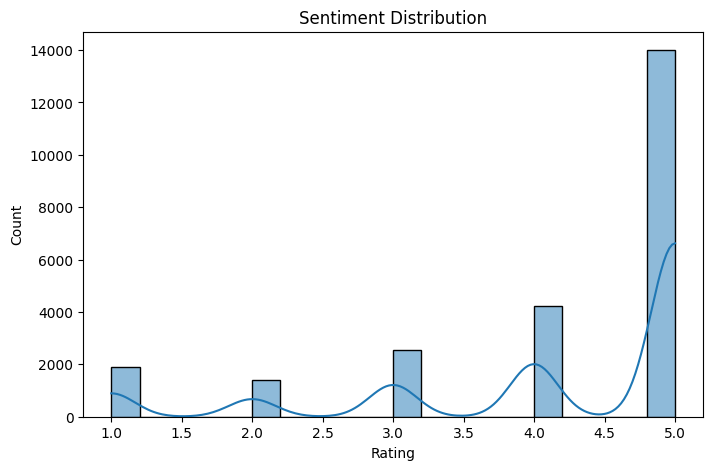

In [29]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(p_movies['rating'], bins=20, kde=True)  # Adjust bin size as needed
plt.title('Sentiment Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


### **3. Class Imbalance Check**
#### **Verifies if the dataset has a balanced distribution of labels.**

In [30]:
p_movies['text'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


ValueError: Image size of 578x124601 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

### **4. N-Gram Analysis**
#### **Examines common bigrams and trigrams to identify frequent phrases.**

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# Define function to extract n-grams
def get_top_ngrams(corpus, n=None, ngram_range=(2,2)):  # Adjust n-gram range (2,2) for bigrams
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]
    return words_freq

# Get top bigrams and trigrams
top_bigrams = get_top_ngrams(p_movies['text'], n=10, ngram_range=(2,2))
top_trigrams = get_top_ngrams(p_movies['text'], n=10, ngram_range=(3,3))

print("Top Bigrams:", top_bigrams)
print("Top Trigrams:", top_trigrams)


Top Bigrams: [('great movie', 942), ('good movie', 925), ('story line', 510), ('love movie', 395), ('year old', 281), ('really enjoyed', 262), ('worth watching', 257), ('loved movie', 253), ('movie great', 240), ('really good', 236)]
Top Trigrams: [('really enjoyed movie', 66), ('movie ive seen', 62), ('really good movie', 61), ('good story line', 47), ('dont waste time', 46), ('great story line', 45), ('based true story', 43), ('great family movie', 41), ('feel good movie', 40), ('love love love', 40)]


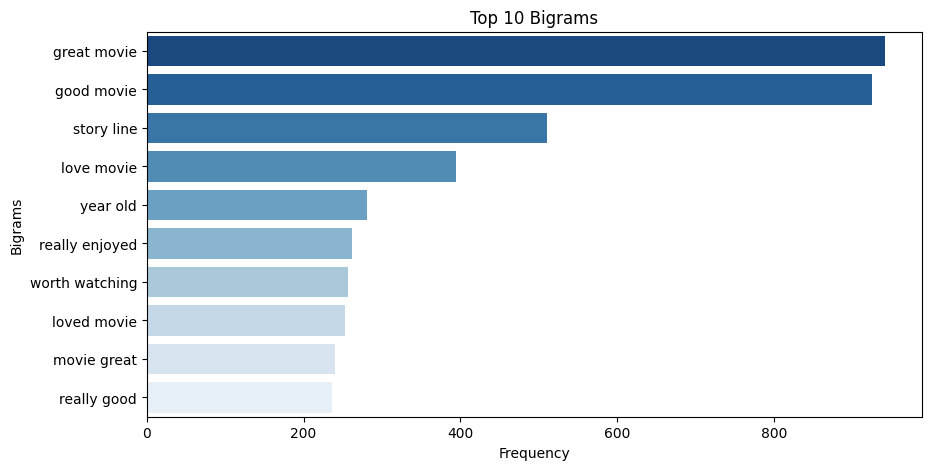

In [32]:
import pandas as pd
import seaborn as sns

# Convert bigrams to DataFrame
bigrams_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])

plt.figure(figsize=(10,5))
sns.barplot(x='Frequency', y='Bigram', data=bigrams_df, palette='Blues_r')
plt.title('Top 10 Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()


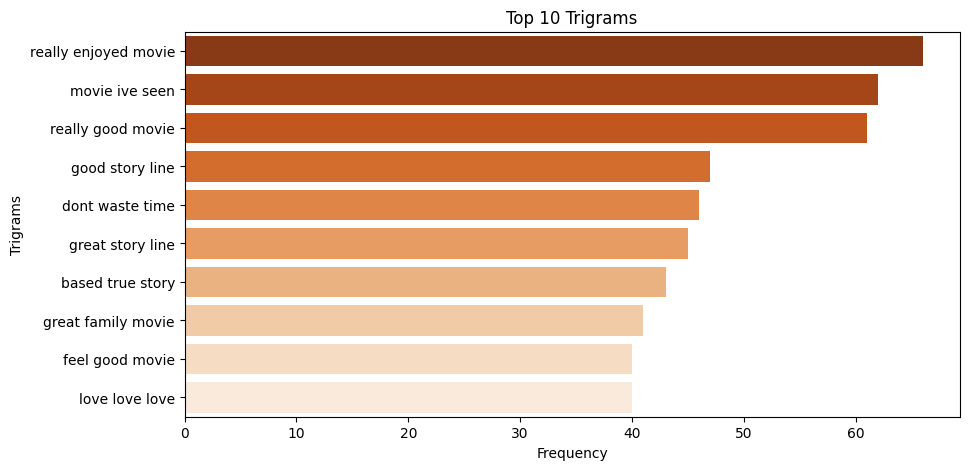

In [33]:
# Convert trigrams to DataFrame
trigrams_df = pd.DataFrame(top_trigrams, columns=['Trigram', 'Frequency'])

plt.figure(figsize=(10,5))
sns.barplot(x='Frequency', y='Trigram', data=trigrams_df, palette='Oranges_r')
plt.title('Top 10 Trigrams')
plt.xlabel('Frequency')
plt.ylabel('Trigrams')
plt.show()


In [36]:
# Define sentiment based on rating
p_movies['sentiment'] = p_movies['rating'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else 'neutral'))

sentiment
positive    18243
negative     3307
neutral      2562
Name: count, dtype: int64


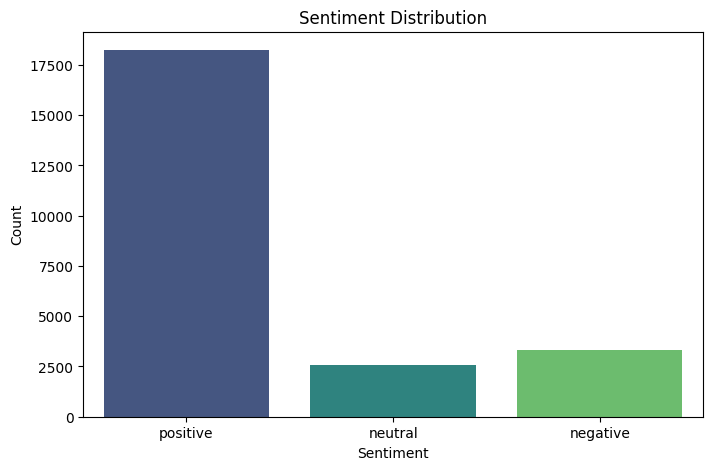

In [37]:
# Check sentiment distribution
print(p_movies['sentiment'].value_counts())

# Visualize sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=p_movies, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [38]:
p_movies.head()

,rating,title_x,text,asin,parent_asin,timestamp,verified_purchase,main_category,title_y,average_rating,rating_number,description,price,categories,year,month,weekday,bert_embedding,sentiment
0,4,Four Stars,pretty good pretty comical scene throughout gr...,B01KBKKU7G,B01KBKKU7G,2016-09-16 18:39:49.000,True,Prime Video,Seven Girlfriends,3.2,333.0,"[""Jesse has never had a problem finding a gir...",12.99,Comedy,2016,9,Friday,"[0.062355723, -0.28965893, 0.032003667, 0.1281...",positive
1,3,Ok love story,bit slow unsatisfying ending,B01M0S0C8M,B01M0S0C8M,2016-11-08 22:14:17.000,True,Prime Video,Still Mine,4.6,4744.0,"[""James Cromwell gives a tour de force perform...",9.99,Drama,2016,11,Tuesday,"[-0.07376289, -0.40309674, 0.22592728, 0.18612...",neutral
2,1,TRASH,movie based solely incest storyline garbage ac...,B00G2TAAVM,B00G2TAAVM,2022-08-22 20:06:25.847,True,Prime Video,How I Live Now,4.3,907.0,"['Set in the near-future UK, Saoirse Ronan pla...",12.99,International,2022,8,Monday,"[0.20666838, -0.1280619, -0.08137178, 0.024098...",negative
3,5,Five Stars,excellent,B018HJ03UC,B018HJ03UC,2016-01-25 18:47:06.000,True,Prime Video,The Martian,4.8,45859.0,"['From legendary director Ridley Scott (Alien,...",4.99,Science Fiction,2016,1,Monday,"[0.2969116, 0.22945474, -0.018994639, -0.02954...",positive
4,2,Not what it used to be,used favorite mine ’ enjoy anymore way zahn le...,B07FLP19K1,B07FLP19K1,2018-12-03 16:52:02.089,True,Prime Video,On The Case with Paula Zahn,4.6,141.0,['On The Case with Paula Zahn takes viewers on...,22.99,Suspense,2018,12,Monday,"[0.16273372, -0.097590715, 0.3668197, 0.161020...",negative


# **Step 1: Train-Test Split**
Split the dataset into training and testing sets to evaluate model performance on unseen data.

In [39]:
from sklearn.model_selection import train_test_split

# Splitting dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(p_movies['text'], p_movies['sentiment'], 
                                                    test_size=0.2, random_state=42, stratify=p_movies['sentiment'])


## **TF-IDF + Logistic Regression**

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Create TF-IDF + Logistic Regression pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(solver='liblinear'))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8194070080862533
              precision    recall  f1-score   support

    negative       0.74      0.46      0.57       662
     neutral       0.53      0.14      0.22       512
    positive       0.84      0.98      0.90      3649

    accuracy                           0.82      4823
   macro avg       0.70      0.53      0.56      4823
weighted avg       0.79      0.82      0.78      4823



## **TF-IDF + Naïve Bayes**

In [41]:
from sklearn.naive_bayes import MultinomialNB

# Create TF-IDF + Naïve Bayes pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7644619531411985
              precision    recall  f1-score   support

    negative       0.95      0.06      0.11       662
     neutral       0.33      0.00      0.00       512
    positive       0.76      1.00      0.87      3649

    accuracy                           0.76      4823
   macro avg       0.68      0.35      0.33      4823
weighted avg       0.74      0.76      0.67      4823



## **TF-IDF + SVM**

In [42]:
from sklearn.svm import SVC

# Create TF-IDF + SVM pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC(kernel='linear'))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8256272029856936
              precision    recall  f1-score   support

    negative       0.71      0.54      0.61       662
     neutral       0.55      0.16      0.25       512
    positive       0.85      0.97      0.91      3649

    accuracy                           0.83      4823
   macro avg       0.70      0.56      0.59      4823
weighted avg       0.80      0.83      0.80      4823



## **TF-IDF + Random Forest**

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Create TF-IDF + Random Forest pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8026124818577649
              precision    recall  f1-score   support

    negative       0.71      0.35      0.47       662
     neutral       0.61      0.14      0.23       512
    positive       0.81      0.98      0.89      3649

    accuracy                           0.80      4823
   macro avg       0.71      0.49      0.53      4823
weighted avg       0.78      0.80      0.76      4823



#### Step 1: Store Model Results
We will store the accuracy of each model in a dictionary for easy comparison.

In [44]:
from sklearn.metrics import accuracy_score, classification_report

# Dictionary to store model performance
model_performance = {}

# Function to evaluate and store results
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store accuracy and F1-score
    model_performance[name] = {
        'Accuracy': acc,
        'F1-Score': report['weighted avg']['f1-score'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall']
    }
    
    print(f"{name} Performance:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Evaluate all models
evaluate_model("Logistic Regression", lr_model, X_test_tfidf, y_test)
evaluate_model("Naïve Bayes", nb_model, X_test_tfidf, y_test)
evaluate_model("SVM", svm_model, X_test_tfidf, y_test)
evaluate_model("Random Forest", rf_model, X_test_tfidf, y_test)


NameError: name 'lr_model' is not defined